In [219]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import warnings
import missingno as msno

%matplotlib inline
pd.set_option('display.max_columns', 90)
warnings.filterwarnings('ignore')

In [220]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/HousePrices.csv', index_col='Id')

In [221]:
data.head()

,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,Dwelling_Type,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**<h2>Data Cleaning and EDA</h2>**

In [222]:
print('Number of rows in data : ', len(data))
print('Number of columns in data : ', len(data.columns))

Number of rows in data :  2073
Number of columns in data :  80


In [223]:
print('Columns : ', data.columns)

Columns :  Index(['Dwell_Type', 'Zone_Class', 'LotFrontage', 'LotArea', 'Road_Type',
       'Alley', 'Property_Shape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'Dwelling_Type', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'Gar

In [224]:
#Analysing the target variable 'Property_Sale_Price'
data.Property_Sale_Price.describe()

count      2073.000000
mean     180967.284129
std       78666.411112
min       34900.000000
25%      130000.000000
50%      163990.000000
75%      214000.000000
max      755000.000000
Name: Property_Sale_Price, dtype: float64

In [225]:
print('Null values : ', sum(data.Property_Sale_Price.isnull()))

Null values :  0


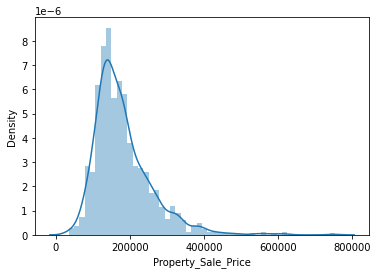

In [226]:
sns.distplot(data.Property_Sale_Price)

The distribution of the target variable is positively skewed

In [227]:
print('Skewness : ', skew(data.Property_Sale_Price))
print('Kurtosis : ', kurtosis(data.Property_Sale_Price))

Skewness :  1.8407900478585033
Kurtosis :  6.244978399388746


The distribution is leptokurtic due to the presence of extreme values (high kurtosis)

<Figure size 1080x576 with 0 Axes>

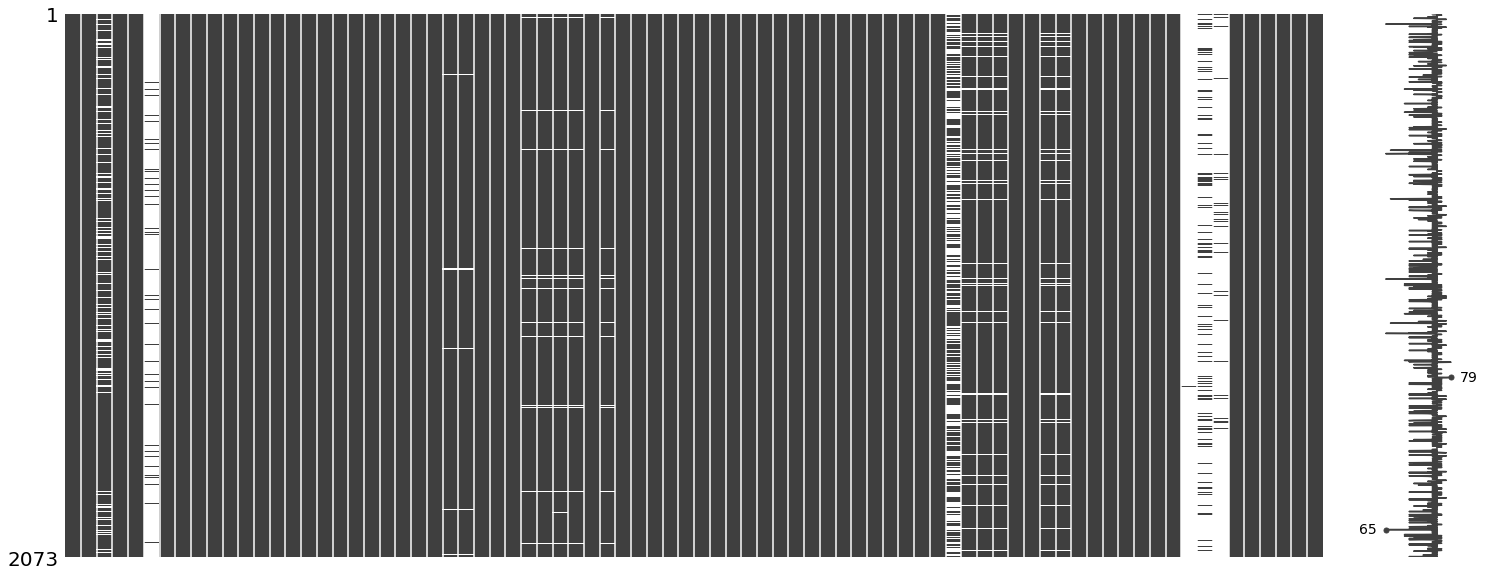

In [228]:
#Lets check null values in the data
plt.figure(figsize=(15, 8))
msno.matrix(data)

It seems like there are some columns with a lot of null values

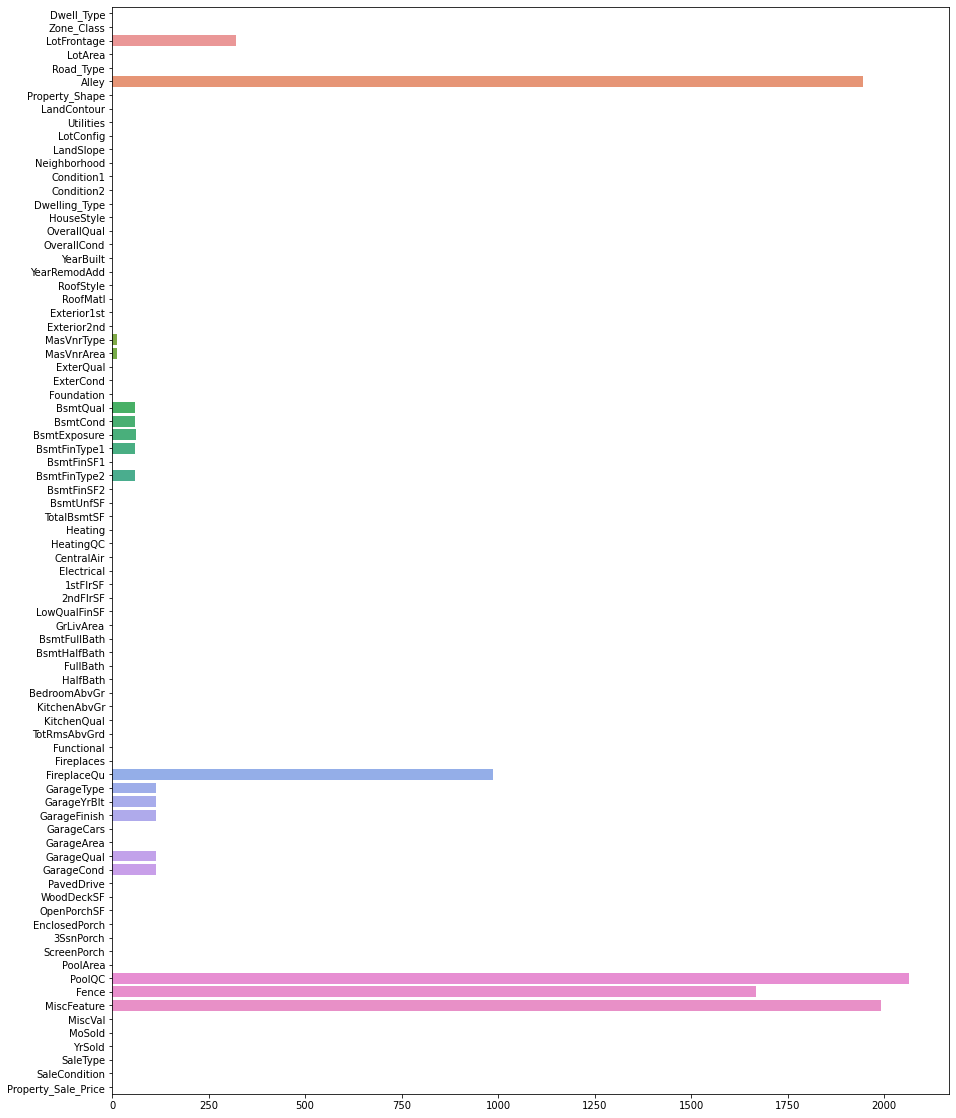

In [229]:
plt.figure(figsize=(15, 20))
sns.barplot(np.sum(data.isnull(), axis=0), data.columns, orient='h')

In [230]:
#Removing columns with null values
data.drop(columns=[col for col in data.columns if sum(data[col].isnull()) > 10], inplace=True)

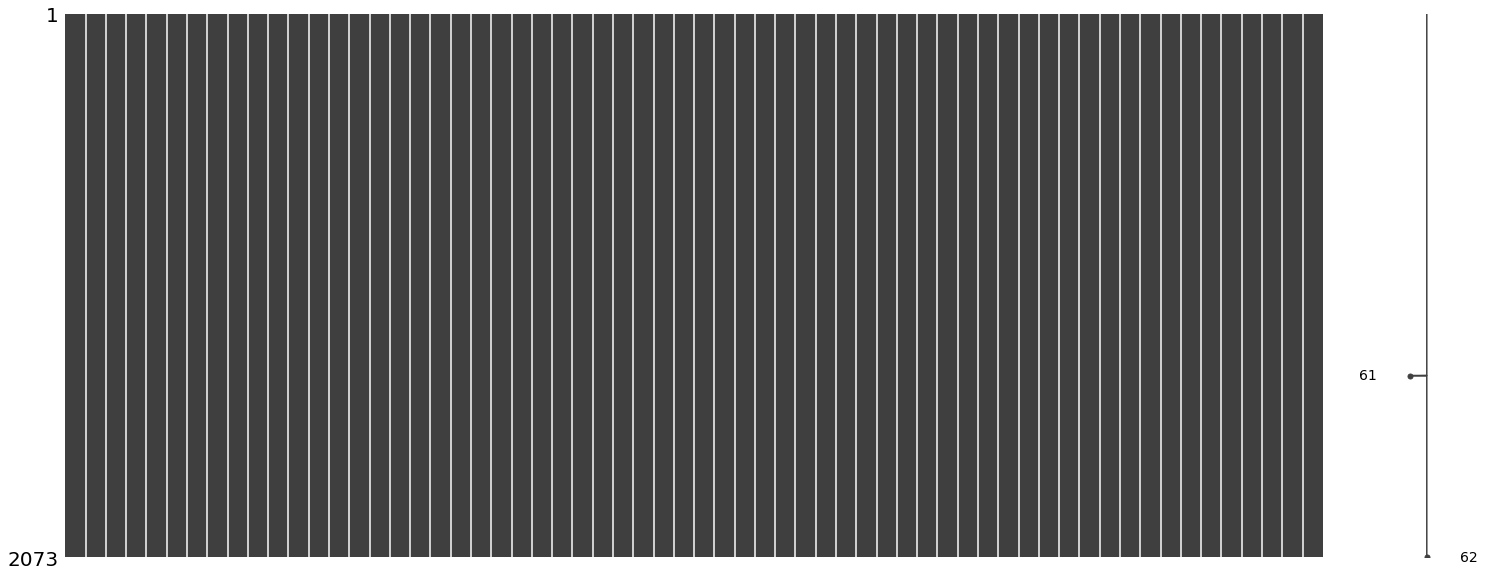

In [231]:
#checking null bvalues in data
msno.matrix(data)

In [232]:
#Analyse Dwell_Type column
data.Dwell_Type.describe()

count    2073.000000
mean       60.556199
std       159.924810
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max      7080.000000
Name: Dwell_Type, dtype: float64

In [233]:
data.Dwell_Type.unique()

array([  60,   20,   70,   50,  190,   45,   90,  120,   30,   85,   80,
        160,   75,  180,   40,  150,  303, 7080])

In [234]:
data.Dwell_Type.value_counts()

20      722
60      431
50      205
30      133
120     114
90       91
160      78
80       78
70       77
190      42
85       34
75       19
180      14
150      13
45       13
40        7
303       1
7080      1
Name: Dwell_Type, dtype: int64

It seems like there are two mislabelled values in Dwell_Type column i.e 303 and 7080

In [235]:
#removing the rows with mislabelled Dwell_Type values
data = data[~data['Dwell_Type'].isin([303, 7080])]

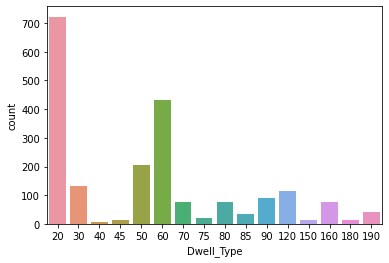

In [236]:
sns.countplot(data.Dwell_Type)

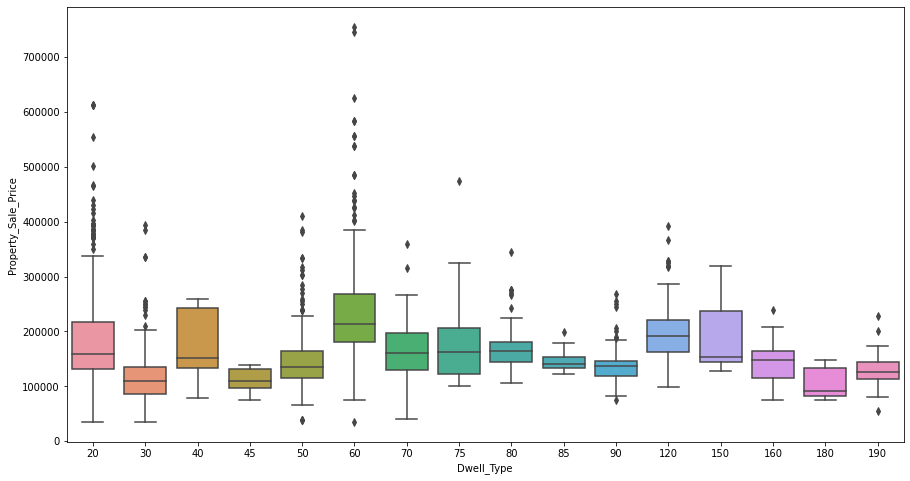

In [237]:
plt.figure(figsize=(15, 8))
sns.boxplot(data.Dwell_Type, data.Property_Sale_Price)

In [238]:
d = data.dropna()

In [239]:
l = LabelEncoder()
for col in data.columns:
  if data[col].dtype == 'O':
    d[col] = l.fit_transform(d[col])

In [240]:
dt = d.values

In [241]:
x = dt[:, :-1]
y = dt[:, -1]

In [242]:
xtr, xt, ytr, yt = train_test_split(x, y, test_size=0.2, shuffle=True)

In [243]:
model = LinearRegression()

In [244]:
model.fit(xtr, ytr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [245]:
print('R2 score for training data : ', model.score(xtr, ytr))
print('R2 score for validation data : ', model.score(xt, yt))

R2 score for training data :  0.8673884271889079
R2 score for validation data :  0.6597991570956819
